## Objective:
## • Understand and practice principal component analysis using scikit learn.

In [1]:
## Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits

### 1. Scikit learn comes with pre-loaded dataset, load the digits dataset from that collection and write a helper function to plot the image using matplotlib.
[Hint: Explore datasets module from scikit learn]

In [2]:
digits = load_digits()

In [3]:
print(digits.data.shape)

(1797, 64)


In [4]:
X, Y = digits.data, digits.target

In [5]:
print(np.shape(X),np.shape(Y))

(1797, 64) (1797,)


In [6]:
import matplotlib.pyplot as plt

<Figure size 1000x1000 with 0 Axes>

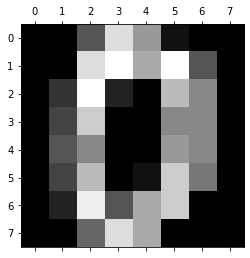

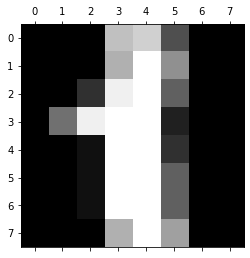

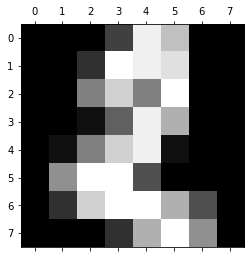

In [7]:
plt.figure(figsize=(10, 10), dpi=100)
plt.gray()
plt.matshow(digits.images[0])
plt.matshow(digits.images[1])
plt.matshow(digits.images[2])
plt.show()

### 2. Make a train-test split with 20% of the data set aside for testing. Fit a logistic regression model and observe the accuracy.

In [8]:
## importing test train split package
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=48, stratify = Y)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1437, 64) (360, 64) (1437,) (360,)


In [11]:
## Importing Logistic regression Library
from sklearn.linear_model import LogisticRegression

In [12]:
lr = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=10000,
                        C=50)

In [13]:
lr.fit(X_train, y_train)

LogisticRegression(C=50, max_iter=10000, solver='saga')

In [14]:
y_pred = lr.predict(X_test)

In [15]:
y_pred[:10]

array([6, 0, 7, 9, 8, 9, 0, 1, 3, 4])

In [16]:
y_test[:10]

array([6, 0, 7, 9, 8, 9, 0, 1, 3, 4])

In [17]:
lr.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
lr.intercept_

array([ 0.00553995, -0.07992395, -0.00444866,  0.00278314,  0.04265639,
       -0.01577953, -0.00241747,  0.01124505,  0.06109686, -0.0207518 ])

In [19]:
## Training Score
lr.score(X_train, y_train)

1.0

In [20]:
## Testing Score
round(lr.score(X_test, y_test),3)

0.978

### 3. Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset. Find out the number of components in the projected subspace.
[Hint: Refer to decomposition module of scikit learn]

In [21]:
## Creating copy of test train split before doing PCA
X_train_orig = X_train
X_test_orig = X_test
y_train_orig = y_train
y_test_orig = y_test

In [22]:
## Apply Standardization before applying PCA transformation
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
# Fit on training set only.
scaler.fit(X_train)

StandardScaler()

In [25]:
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Now applying PCA transformation on Standardized data

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(.95)

In [28]:
## Fitting the tranining data
pca.fit(X_train)

PCA(n_components=0.95)

In [29]:
## Applying PCA Transformation to both traning and test dataset
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [30]:
X_train.shape

(1437, 39)

In [31]:
## Creating instance of Logistic Regression
lr_pca = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=10000,
                        C=50)

In [32]:
lr_pca.fit(X_train, y_train)

LogisticRegression(C=50, max_iter=10000, solver='saga')

In [33]:
lr_pca.predict(X_test[0].reshape(1,-1))

array([6])

In [34]:
y_test[0]

6

In [35]:
## Predicting first 10 images
lr_pca.predict(X_test[0:10])

array([6, 0, 7, 9, 8, 9, 0, 1, 3, 4])

In [36]:
## Verifying first 10 images with prediction
y_test[0:10]

array([6, 0, 7, 9, 8, 9, 0, 1, 3, 4])

In [37]:
## Training Score
round(lr_pca.score(X_train, y_train),3)

0.997

In [38]:
## Testing Score
round(lr_pca.score(X_test, y_test),3)

0.964

## The accuracy is little less as compared to basic model but we have reduced overfitting of the model.

### 5. Compute the confusion matrix and count the number of instances that has gone wrong. For each of the wrong sample, plot the digit along with predicted and original label.

In [39]:
from sklearn import metrics

In [40]:
y_pred = lr_pca.predict(X_test)

In [41]:
cm = metrics.confusion_matrix(y_true=y_test, 
                         y_pred = y_pred, 
                        labels = lr_pca.classes_)

In [42]:
print(cm)

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 33  1  0  0  1  0  0  1  0]
 [ 0  0 34  0  0  0  0  0  0  1]
 [ 0  0  0 36  0  1  0  0  0  0]
 [ 0  2  0  0 33  0  0  0  0  1]
 [ 0  0  0  0  0 36  1  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 35  1  0]
 [ 0  0  0  0  0  0  0  1 34  0]
 [ 0  0  0  0  0  1  0  0  1 34]]


#### Getting details of incorrect predictions

In [43]:
wrong_img_index = []
image_cnt = 0
for orig,pred in zip(y_test,y_pred):
    if orig != pred:
        wrong_img_index.append(image_cnt)
    image_cnt += 1

In [44]:
## Wrong classified images are
wrong_img_index

[16, 29, 47, 82, 147, 169, 175, 272, 274, 302, 320, 322, 347]

In [45]:
X_test.shape

(360, 39)

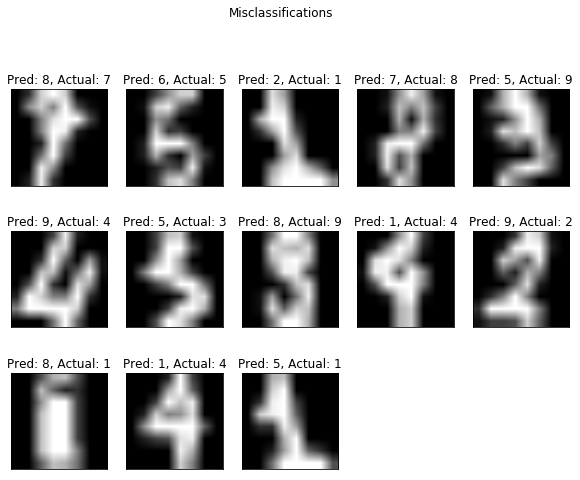

In [46]:
plt.figure(figsize=(10,10))
plt.suptitle('Misclassifications');

for plot_index, bad_index in enumerate(wrong_img_index):
    p = plt.subplot(4,5, plot_index+1)
    
    p.imshow(X_test_orig[bad_index].reshape(8,8), cmap=plt.cm.gray,interpolation='bilinear')
    p.set_xticks(())
    p.set_yticks(())
    
    p.set_title(f'Pred: {y_pred[bad_index]}, Actual: {y_test_orig[bad_index]}');